# Malaria Cell Classification Using CNN

This notebook demonstrates a deep learning approach to classify malaria-infected cells using Convolutional Neural Networks (CNNs).

---

# Project Overview

In this project, we'll classify malaria cell images into two classes: **Parasitized** (infected) and **Uninfected**. We'll use a pre-trained model to perform inference and analyze the results.

**Dataset Information:**
- Source: `cell_images.zip`
- Contains 2 folders: Parasitized (Infected) & Uninfected
- Total of 27,558 images
- Binary Classification problem

**Files Provided:**
- Dataset: `cell_images.zip`
- Model Weights: `malaria_detector.h5`
- Training History: `history.csv`

**Acknowledgements:** This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

**Note:** We'll be working with real image files and feeding them to our model in batches to handle the large dataset efficiently.

# Importing relevant libraries

In [1]:
import os #provides functions for interacting with the operating system.
import tensorflow as tf #open source library for numerical computation that makes machine learning faster and easier.
from os.path import join as pjoin #join one or more path components intelligently
import pandas as pd #used for data manipulation and analysis
import numpy as np #library used for working with arrays
import matplotlib.pyplot as plt #used for plotting 2D graphics
import seaborn as sns #uses Matplotlib underneath to plot graphs.
from matplotlib.image import imread #Read an image from a file into an array.

# Visualizing the Data

- It is important to first take acquaintance with the data. (To recognize patterns, dimension, quality, ecc of images, ecc)
- An Exploratory Data Analysis, or EDA, is an exhaustive look at existing data available.
- An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.
- You can’t draw reliable conclusions from a massive quantity of data by just gleaning over it—instead, you have to look at it carefully and methodically through an analytical lens.
- Getting a “feel” for this critical information can help you detect mistakes, debunk assumptions, and understand the relationships between different key variables. Such insights may eventually lead to the selection of an appropriate predictive model.

Let's take a closer look at the data.

Unzip the file.
Structure should be 
- cell_images
  - train
    - parasitized
    - uninfected
  - test
    - parasitized
    - uninfected

In [2]:
#location where cell_images folder, history and model weights is located is located
my_data_dir = "data/cell_images/"
history_path = "data/history.csv"
model_weight_path = "data/malaria_detector.h5"

In [3]:
def check_dir(my_data_dir):
    """This function returns directories available in the cell_images folder
    my_data_dir: path to cell_images folder
    
    Returns: Directory list"""
    
    return os.listdir(my_data_dir)

In [4]:
test_path = pjoin(my_data_dir, 'test')
train_path = pjoin(my_data_dir, 'train')

In [5]:
def check_sub_dir(my_data_dir, train_path, test_path):
    """This function returns sub-directories available in the cell_images/test and cell_images/train folder
    my_data_dir: path to cell_images folder
    train_path: path to train folder of cell_images
    test_path: path to test folder of cell_images
    
    Returns: Sub-Directory list"""
    
    train_sub_dirs = os.listdir(os.path.join(my_data_dir, train_path))
    test_sub_dirs = os.listdir(os.path.join(my_data_dir, test_path))

    return {
        "train": train_sub_dirs,
        "test": test_sub_dirs
    }

In [6]:
def get_image_list(split, parasitized, my_data_dir = my_data_dir):
    """This function returns the list of images name in any particular folder
    my_data_dir: path to cell_images folder
    split: if 'train', gets the list of images for training folder and if 'test' gets the list of images for testing folder
    parasitized: Boolean, True, if want to get list of images for infected cell and 
                          False if want to get list of images for uninfected images
    
    Returns: list having images name"""

    # Determine the sub-folder based on the split and parasitized flag
    folder = "Parasitized" if parasitized else "Uninfected"
    sub_dir = pjoin(my_data_dir, split, folder)  # Construct the full path
    
    # List and return all images in the chosen sub-directory
    return os.listdir(sub_dir)

In [15]:
get_image_list('train', True)

['C189P150ThinF_IMG_20151203_142224_cell_84.png',
 'C91P52ThinF_IMG_20150821_123116_cell_189.png',
 'C84P45ThinF_IMG_20150818_101226_cell_98.png',
 'C144P105ThinF_IMG_20151015_163432_cell_310.png',
 'C136P97ThinF_IMG_20151005_141803_cell_131.png',
 'C60P21thinF_IMG_20150804_105034_cell_105.png',
 'C176P137NThinF_IMG_20151201_122708_cell_126.png',
 'C136P97ThinF_IMG_20151005_142437_cell_119.png',
 'C173P134NThinF_IMG_20151130_115733_cell_227.png',
 'C85P46ThinF_IMG_20150820_105154_cell_221.png',
 'C101P62ThinF_IMG_20150918_151507_cell_49.png',
 'C116P77ThinF_IMG_20150930_171844_cell_100.png',
 'C48P9thinF_IMG_20150721_160406_cell_247.png',
 'C184P145ThinF_IMG_20151203_103114_cell_149.png',
 'C99P60ThinF_IMG_20150918_141620_cell_56.png',
 'C132P93ThinF_IMG_20151004_152045_cell_111.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_153.png',
 'C116P77ThinF_IMG_20150930_171844_cell_114.png',
 'C171P132ThinF_IMG_20151119_153150_cell_222.png',
 'C176P137NThinF_IMG_20151201_122708_cell_132.png',


In [7]:
def plot_cell(split, parasitized, idx = 0, my_data_dir = my_data_dir):
    """This function plots a particular cell identified by its idx for infected/uninfected and train/test folder
    my_data_dir: path to cell_images folder
    split: is a string, 'train' or 'test'. It differentiate the training and test set for plotting.
           if 'train', function plots the cell for training folder and if 'test' function plots the cell for testing folder
    parasitized: Boolean, True, if want to plot cell for infected cell and 
                          False if want to plot cell for uninfected images
    idx: index of cell to be plotted, Default:0
    
    Returns: Don not return anything"""
    
    # Validate input directory
    if not my_data_dir:
        raise ValueError("my_data_dir cannot be None. Please provide the path to the cell_images folder.")

    # Get the list of images
    image_list = get_image_list(split, parasitized, my_data_dir)
    
    # Validate index
    if idx < 0 or idx >= len(image_list):
        raise IndexError(f"Index {idx} is out of range for the list of images.")
    
    # Construct the full path to the selected image
    folder = "Parasitized" if parasitized else "Uninfected"
    image_path = pjoin(my_data_dir, split, folder, image_list[idx])
    
    # Read and plot the image
    img = imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off the axis
    plt.title(f"{'Parasitized' if parasitized else 'Uninfected'} Cell from {split.capitalize()} Set")
    plt.show()

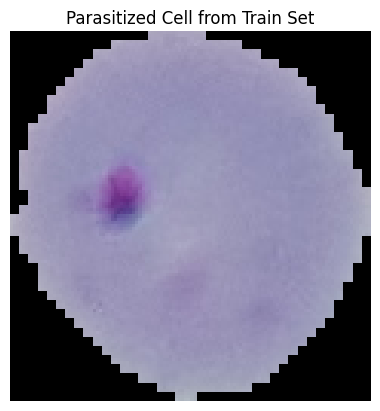

In [8]:
plot_cell('train', True)

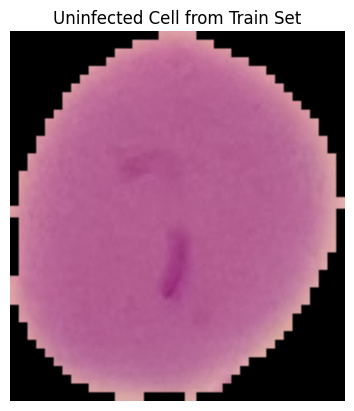

In [9]:
plot_cell('train', False)

In [10]:
def get_dim_for_all_images(split, parasitized):
    """This function gets dimentions of all images in infected/uninfected and train/test folder.
       Since images in the folder don't have unique shape, they all have different dimentions,
       This function will help us identify an average dim of all image so that we can fix the input size for our model 
       and resize all the image to the average dimentions of the images
    my_data_dir: path to cell_images folder
    split: if 'train', gets dim for training folder and if 'test' gets dim for testing folder
    parasitized: Boolean, True, if want to get dim for infected cell and 
                          False if want to get dim for uninfected images
    
    Returns: list of Heights, Widths and Channels for each image present in the folder"""

    if not my_data_dir:
        raise ValueError("my_data_dir cannot be None. Please provide the path to the cell_images folder.")

    # Get the list of images in the specified folder
    image_list = get_image_list(split, parasitized, my_data_dir)
    
    # Initialize lists to store dimensions
    heights = []
    widths = []
    channels = []
    
    # Define folder based on parasitized/uninfected
    folder = "Parasitized" if parasitized else "Uninfected"
    
    # Loop through images and get dimensions
    for image_name in image_list:
        # Ensure the file has a .png extension
        if image_name.endswith(".png"):
            # Construct full image path
            image_path = pjoin(my_data_dir, split, folder, image_name)
            
            # Read the image
            img = imread(image_path)
            
            # Get shape (height, width, channels)
            height, width, channel = img.shape
            
            # Append dimensions to respective lists
            heights.append(height)
            widths.append(width)
            channels.append(channel)
    
    return heights, widths, channels

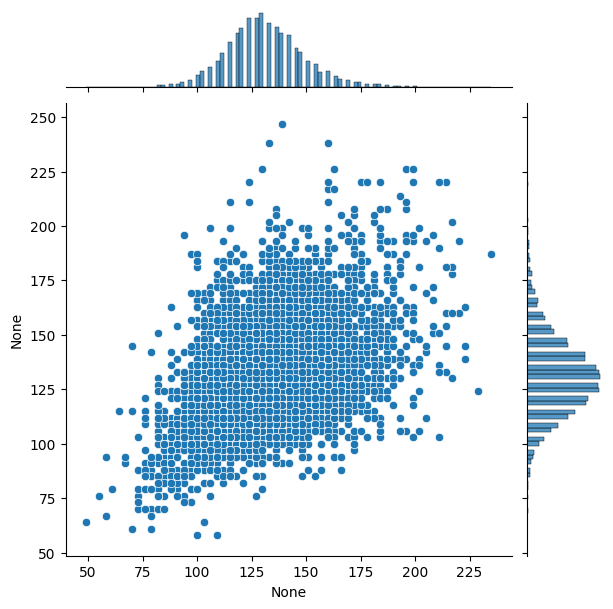

In [11]:
dim1, dim2, colors = get_dim_for_all_images('train', False)
sns.jointplot(x=dim1, y=dim2) #this may take some time to print the result. Have patience :)

In [12]:
print("Mean Height of image is {0}\nMean Width of image is {1}".format(np.mean(dim1), np.mean(dim2)))

Mean Height of image is 131.64820899110507
Mean Width of image is 131.4041990544114


In [13]:
#using average size of image available with us
image_shape = (130,130,3)

# Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

## Image Manipulation (Augmentation)
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Using Image Augmentation our model becomes more robust to different images that our data set doesn't have.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The TensorFlow keras API provides the capability to fit models using image data augmentation via the **ImageDataGenerator** class.

Check out these blog posts on Image Augmentation for better understanding. [Blog Post 1](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/),  [Blog Post 2](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/), and [Blog Post 3](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/#:~:text=Image%20data%20augmentation%20is%20a,of%20images%20in%20the%20dataset.&text=Image%20data%20augmentation%20is%20used,of%20the%20model%20to%20generalize.)

Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for a full list of all the parameters you can use here!

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=

`ImageDataGenerator` Generate batches of tensor image data with real-time data augmentation. 

**Arguments to be used in `ImageDataGenerator`:**
- `rotation_range` - rotate the image 20 degrees
- `width_shift_range` - Shift the pic width by a max of 10%
- `height_shift_range` - Shift the pic height by a max of 10%
- `rescale` - Rescale the image by normalzing it (use 1/255)
- `shear_range` - Shear means cutting away part of the image (max 10%)
- `zoom_range` - Zoom in by 10% max
- `horizontal_flip` - Allow horizontal flipping
- `fill_mode` - Fill in missing pixels with the nearest filled value
- `validation_split` - use 20% of total data as validation data

**Dataset Types:**
- **Training Dataset**: The sample of data used to fit the model.
- **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
- **Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

**Note:** In the case of test image generator, set every argument to 0, except rescale to 1/255 and fill_mode to nearest; this is because we don't want any image augmentation in case of test image generator.

Read [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for further understanding each argument.

In [16]:
def image_generator(rotation_range, width_shift_range, height_shift_range, rescale, shear_range, zoom_range, horizontal_flip, fill_mode, validation_split):
    """This function returns a image generator
       All arguments are mentioned above this cell. For more info, check documentation
    
    Returns: ImageGenerator"""
    
    return ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        rescale=rescale,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        fill_mode=fill_mode,
        validation_split=validation_split
    )

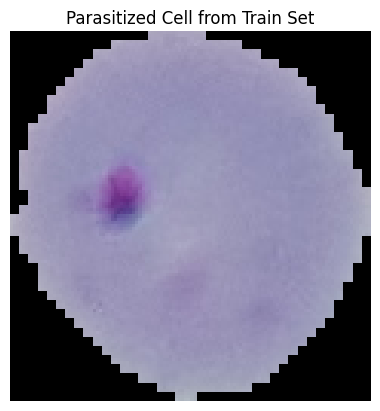

In [17]:
plot_cell('train', True)

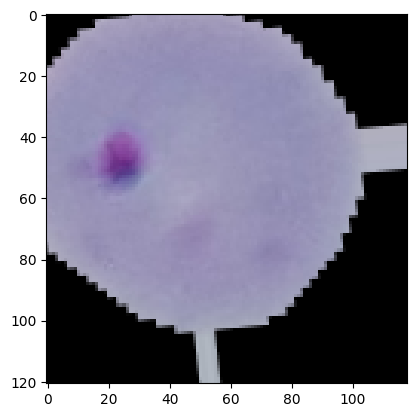

In [18]:
img = imread(pjoin(pjoin(my_data_dir, 'train'), 'parasitized', get_image_list('train', True)[0]))
plt.imshow(image_generator(20, 0.10, 0.10, 1/255, 0.10, 0.10, True, 'nearest', 0.20).random_transform(img))
plt.show()

# Creating the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

Given below is the architechture you've to make in the next cell using Sequential

`Convolutions(#32 filters, relu) -> MaxPooling -> Convolutions(#64 filters, relu) -> MaxPooling -> Convolutions(#64 filters, relu) -> MaxPooling -> Flatten -> Dense(#128 node, relu) -> Dropout(50%) -> Dense(#1 node, sigmoid)`

You can look into the official [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to see the examples on how to use `Sequential`. This will give you an idea on how to build a model

In [20]:
filters_list = [32, 64, 64] # [filters for 1st conv, 2nd conv and 3rd conv]
nodes_list = [128, 1] # [Nodes for 1st dense layer and last layer]
conv_filter_size = 3 # filter size for all conv layers
pool_filter_size = 2 # filter size for all MaxPool layers
activation_list = ['relu', 'sigmoid'] # [relu - activtion function for all conv and dense layer, sigmoid - for last layer]
dropout = 0.50 # %age of neurons to be randomly dropped after 1st dense layer

def classification_model(filters_list = filters_list, nodes_list = nodes_list, conv_filter_size = conv_filter_size, pool_filter_size = pool_filter_size, activation_list = activation_list, dropout = dropout):
    """This function implements a CNN model and returns the model created using Sequential
    
    Returns: model"""

    # Initialize the Sequential model
    model = Sequential()

    # Add Convolutional layers and MaxPooling layers
    model.add(Conv2D(filters_list[0], (conv_filter_size, conv_filter_size), activation=activation_list[0], input_shape=(130, 130, 3)))  # Input layer
    model.add(MaxPooling2D(pool_size=(pool_filter_size, pool_filter_size)))

    model.add(Conv2D(filters_list[1], (conv_filter_size, conv_filter_size), activation=activation_list[0]))
    model.add(MaxPooling2D(pool_size=(pool_filter_size, pool_filter_size)))

    model.add(Conv2D(filters_list[2], (conv_filter_size, conv_filter_size), activation=activation_list[0]))
    model.add(MaxPooling2D(pool_size=(pool_filter_size, pool_filter_size)))

    # Flatten the output for the dense layers
    model.add(Flatten())

    # Add Dense layers
    model.add(Dense(nodes_list[0], activation=activation_list[0]))
    model.add(Dropout(dropout))
    model.add(Dense(nodes_list[1], activation=activation_list[1]))  # Output layer with sigmoid activation

    # Return the constructed model
    return model

In [21]:
model = classification_model()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

After defining our model and stacking the layers, we have to configure our model. We do this configuration process in the compilation phase.

Before training the model we need to compile it and define the loss function, optimizers, and metrics for prediction.

Although we're not training the model here, but we need to compile our model in order to check the loss and accuracy of test set

We compile the model using `.compile()` method.

In [23]:
def compile_model(model, loss, optimizer, metrics):
    """This function compiles the model with loss, optimizer and metrics that is to be monitered
    model: defined model
    loss: loss function to be used. In this problem we will be using 'binary_crossentropy'
    optimizer: optimizer used to update the model weights. In this problem we will be using 'SGD'
    metrics: list of metrics that is to be monitered. in this we used ['accuracy']
    
    Returns: Do not return anything"""
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [24]:
compile_model(model, 'binary_crossentropy', 'SGD', ['accuracy'])

## Early Stopping

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

A problem with training neural networks is in the choice of the number of training epochs to use.

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

`EarlyStopping` - Stop training when a monitored metric has stopped improving.

**Arguments to be used in `EarlyStopping`:**
- `monitor`: Quantity to be monitored. In this case we monitor val_loss
- `patience`: Number of epochs with no improvement after which training will be stopped. We use 2 epochs

In [26]:
def early_stopping(monitor='val_loss', patience=2):
    """This function implements an Early Stopping criterion.
    
    Returns: early stopping criterion"""
    
    early_stopping_callback = EarlyStopping(monitor=monitor, patience=patience, restore_best_weights=True)
    return early_stopping_callback

## Training the Model

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n
    
**Luckily it's already done for you. You don't have to do this**

In [27]:
help(image_generator(20, 0.10, 0.10, 1/255, 0.10, 0.10, True, 'nearest', 0.20).flow_from_directory)

Help on method flow_from_directory in module keras.src.legacy.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.legacy.preprocessing.image.ImageDataGenerator instance



In [28]:
batch_size = 16

In [29]:
image_gen = image_generator(20, 0.10, 0.10, 1/255, 0.10, 0.10, True, 'nearest', 0.20)

#for test image generator, we don't want two splits like training image generator(training/validation.)
#also in test image generator, we don't want any image augmentation/manipulation so setting everything to 0 except rescaling
test_image_gen = image_generator(0, 0, 0, 1/255, 0, 0, False, 'nearest', 0.0)

In [30]:
def flow_from_dir(generator, split, target_size, batch_size, class_mode, subset, shuffle, my_data_dir = my_data_dir):
    """This function gets data from train/test folder
    my_data_dir: path to cell_images folder
    generator: image generator implemented earlier, don't forget that values of this function is 
               dependent on whether it's train or test generator
    split: if 'train', gets data for training folder and if 'test' gets data for testing folder
    target_size: tuple(H, W), already defined in begining
    batch_size: int, number of training examples utilized in one iteration. As already said in begining that we're dealing 
                with large dataset, so it won't be possible for us to fit in the memory all data at once, so we will be 
                using batch processing where only a part of whole data is processed in one iteration.
    class_mode: 'binary', since it's a binary classification
    subset: 'training'/'validation' - ONLY FOR training and validation image generator flow from directory. 
             Use None if it's for test image generator flow from directory.
    shuffle: True/False. Use True in case of training generator and False in case of test generator
    
    Returns: image_generator_flow_from_directory"""
    
    # Define the directory based on the split (train/test)
    if split == 'train':
        directory = pjoin(my_data_dir, 'train')
    elif split == 'test':
        directory = pjoin(my_data_dir, 'test')
    else:
        raise ValueError("split must be either 'train' or 'test'")
    
    # Apply the generator's flow_from_directory method
    if split == 'train':
        # For training, use validation_split if subset is provided
        return image_gen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            class_mode=class_mode,
            subset=subset,
            shuffle=shuffle
        )
    else:
        # For test data, no subset needed
        return image_gen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            class_mode=class_mode,
            shuffle=shuffle
        )

In [31]:

train_image_gen = flow_from_dir(image_gen, 'train', (130, 130), batch_size, 'binary', 'training', True)
val_image_gen = flow_from_dir(image_gen, 'train', (130, 130), batch_size, 'binary', 'validation', True)
test_image_gen = flow_from_dir(test_image_gen, 'test', (130, 130), batch_size, 'binary', None, False)

Found 19968 images belonging to 2 classes.
Found 4990 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Use code given below to train a model from scratch

`results = model.fit(train_image_gen,epochs=20, validation_data=val_image_gen, callbacks=[early_stop])`

- Code to save the model wieghts after training
  - `model.save('malaria_detector.h5')`
- Code to save the history of model training
  - `pd.DataFrame.from_dict(results.history).to_csv('history.csv',index=False)`

# Evaluating the Model

Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. TensorFlow Keras model provides a method, evaluate which does the evaluation of the model.

In this section we mainly load the model weights (If Pre-trained Model), see the training history of the model to see how loss and accuracy are changing with respect to epoch, evaluate the trained model's performance on test data using `evaluate` method of model, prediction on the test data using `predict` method of model and finally visualizing the predictions

In [33]:
def load_weight_history(model, model_path, history_path):
    """This function loads the weight to defined model and also the history of pre-trained model
    model: defined model
    model_path: path to .h5 file
    history_path: path to .csv file
    
    Returns: pretrained mode and history dataframe"""
    
    # Load model weights from the specified file path
    model.load_weights(model_path, by_name=True)
    
    # Load the history CSV file into a pandas DataFrame
    history_df = pd.read_csv(history_path)
    
    # Return the model with loaded weights and the history DataFrame
    return model, history_df

In [34]:
model, losses = load_weight_history(model, model_weight_path, history_path)

<Axes: >

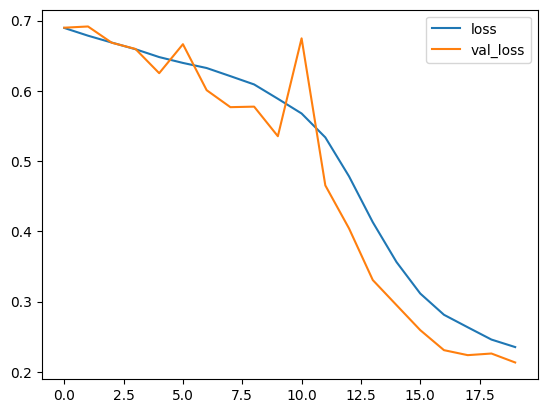

In [35]:
losses[['loss','val_loss']].plot()

<Axes: >

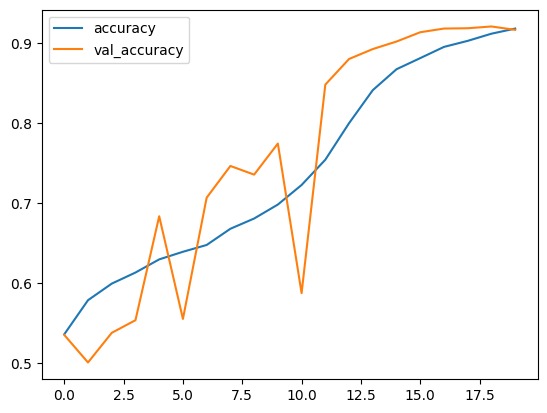

In [36]:
losses[['accuracy','val_accuracy']].plot()

In [37]:
def evaluate_n_predict(model, test_image_gen):
    """This function evaluates the model on test generator and predicts probabilities of test generator image
    model: defined model
    test_image_gen: test image generator flow from directory
    
    Returns: Result of evaluation and pred_probabilities for each image"""
    
    # Evaluate the model on the test data
    evaluation_result = model.evaluate(test_image_gen, verbose=1)
    
    # Reset the generator before predictions
    test_image_gen.reset()
    
    # Predict probabilities for each image in the test data
    pred_probabilities = model.predict(test_image_gen, verbose=1)
    
    return evaluation_result, pred_probabilities

In [38]:

result, pred_probabilities = evaluate_n_predict(model, test_image_gen)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.7708 - loss: 0.6811
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step


In [39]:
print("Loss: {0}\nAccuracy{1}".format(result[0], result[1]))

Loss: 0.6939518451690674
Accuracy0.48153847455978394


In [40]:
pred_probabilities

array([[0.48424038],
       [0.4846681 ],
       [0.48039556],
       ...,
       [0.48577106],
       [0.49221364],
       [0.49454248]], dtype=float32)

In [41]:
def prob_to_pred(pred_probabilities, threshold):
    """This function converts the prediction probability to classwise prediction
    pred_probabilities: probability of prediction
    threshold: partitioning value that classifies probability to prediction. 
               Usually we take it as 0.5, but it can change depending upon problem statement
    
    Returns: 1D Vector having True if greater than threshold and False if less than threshold
             Remember, False corresponds to 0 which in turn corresponds to infected cell and vice versa"""
    
    return pred_probabilities > threshold

In [42]:
predictions = prob_to_pred(pred_probabilities, 0.5)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64      1300
           1       0.45      0.08      0.14      1300

    accuracy                           0.49      2600
   macro avg       0.48      0.49      0.39      2600
weighted avg       0.48      0.49      0.39      2600



In [45]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1173,  127],
       [1194,  106]])

# Predicting on an Image

In [46]:
from tensorflow.keras.preprocessing import image

In the next cell, you will implement a function to plot a similar figure as shown below

**Description of Figure**
- Figure contains (2,5) subplots
- 1st row contains images only from infected cell
- 2nd row contains images only from uninfected cell
- these 5 images each for infected and uninfected cell are randomly chosen
- Each subplot has a title. If the prediction is correct then title is 'correct' and if not then 'incorrect'
![](download.png)

In [47]:
def plot_prediction(model, threshold, image_shape = (130,130,3), my_data_dir = my_data_dir):
    """This function plots the prediction from the model for test data
    model: defined model
    threshold: partitioning value that classifies probability to prediction. 
               Usually we take it as 0.5, but it can change depending upon problem statement
    image_shape: already defined (130,130,3)
    my_data_dir: path to cell_images folder"""
            
    # This is to separate lists for parasitized and uninfected images
    parasitized_files = get_image_list('test', True)
    uninfected_files = get_image_list('test', False)
    
    # Randomly select five images from each class
    parasitized_samples = np.random.choice(parasitized_files, 5, replace=False)
    uninfected_samples = np.random.choice(uninfected_files, 5, replace=False)
    
    plt.figure(figsize=(15, 6))
    
    # Parasitized images
    for i, img_name in enumerate(parasitized_samples, 1):
        # Load and preprocess image
        img_path = pjoin(my_data_dir, 'test', 'Parasitized', img_name)
        img = image.load_img(img_path, target_size=image_shape)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        
        # Get prediction
        pred = model.predict(img_array, verbose=0)
        pred_class = pred[0][0] > threshold
        correct = not pred_class  
        
        # Plot
        plt.subplot(2, 5, i)
        plt.imshow(img)
        plt.title('Correct' if correct else 'Incorrect')
        plt.axis('off')
    
    # Uninfected images
    for i, img_name in enumerate(uninfected_samples, 1):
        # Load and preprocess image
        img_path = pjoin(my_data_dir, 'test', 'Uninfected', img_name)
        img = image.load_img(img_path, target_size=image_shape)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        
        # Get prediction
        pred = model.predict(img_array, verbose=0)
        pred_class = pred[0][0] > threshold
        correct = pred_class  
        
        # Plot
        plt.subplot(2, 5, i+5)
        plt.imshow(img)
        plt.title('Correct' if correct else 'Incorrect')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return None

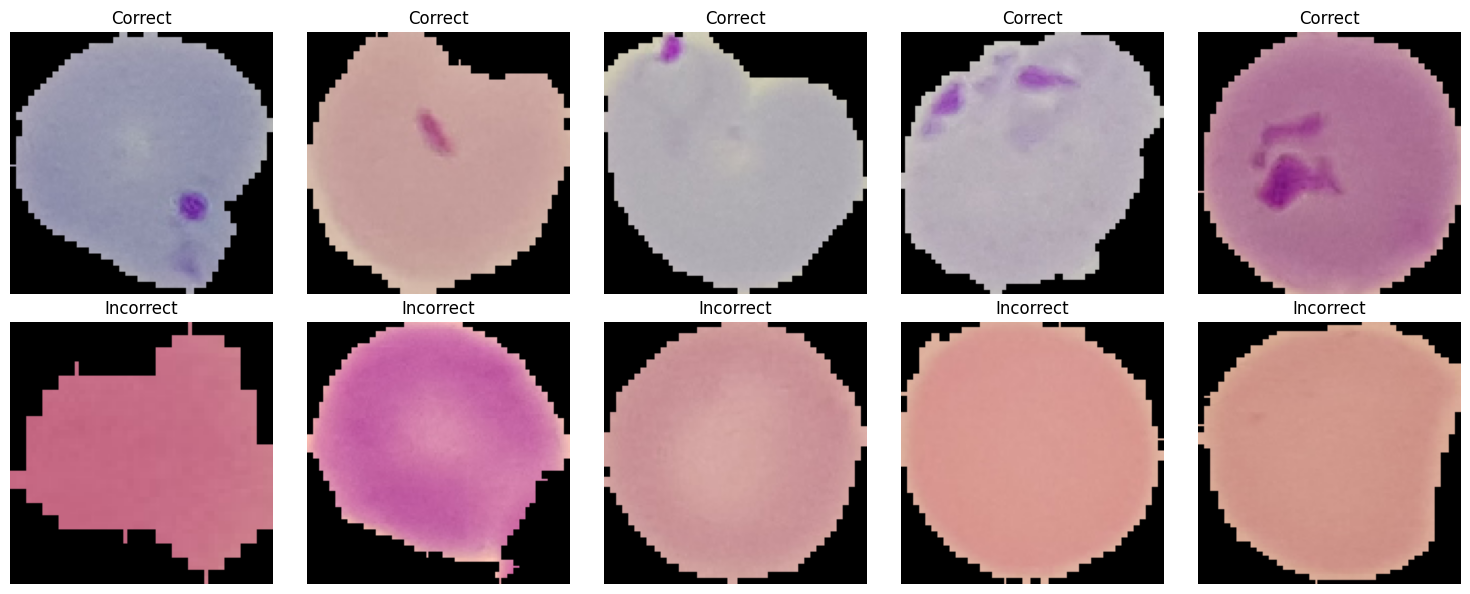

In [48]:
plot_prediction(model, 0.5)